In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from pandas import ExcelFile

In [3]:
df = pd.read_excel('NHH Historical Data Distribution.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,44180,44571,44571,43946,395.55K,-0.0070
1,2021-07-02,43868,44102,44102,43633,228.91K,-0.0071
2,2021-07-05,43399,43789,43789,41444,348.74K,-0.0107
3,2021-07-06,43789,43555,44337,43399,275.34K,0.0090
4,2021-07-07,43555,43399,43711,42695,271.88K,-0.0053


In [4]:
r_t = np.log(df['Price']/df['Price'].shift(1))
mean = np.nanmean(r_t)
r_t[0]=mean
r_t[:5]


0   -0.002677
1   -0.007087
2   -0.010749
3    0.008946
4   -0.005358
Name: Price, dtype: float64

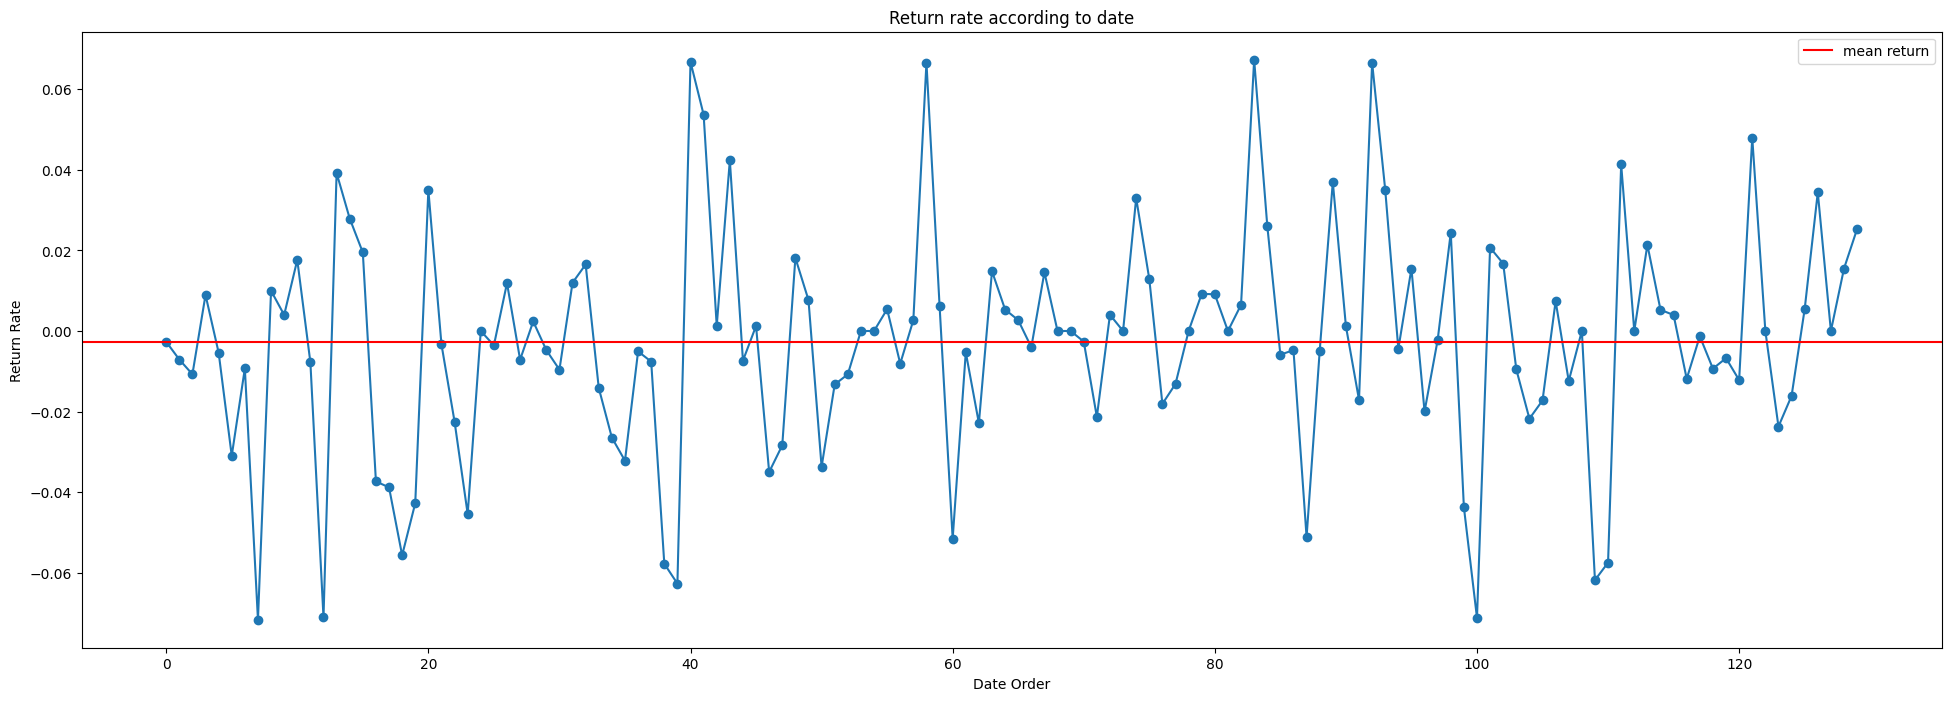

In [5]:
plt.figure(figsize=(24, 8))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

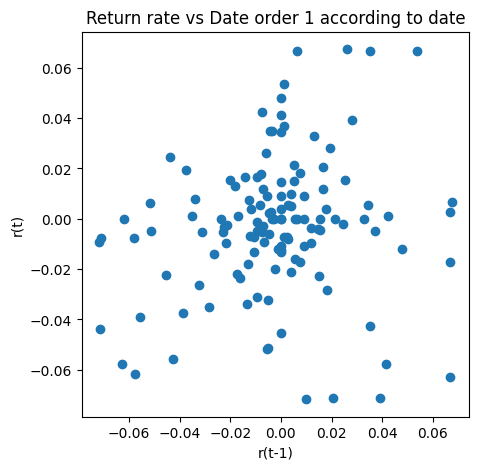

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(x=r_t[1:], y=r_t[:-1])
plt.title('Return rate vs Date order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25084\4041184270.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r_t, bins = 20)


Text(0, 0.5, 'Frequency')

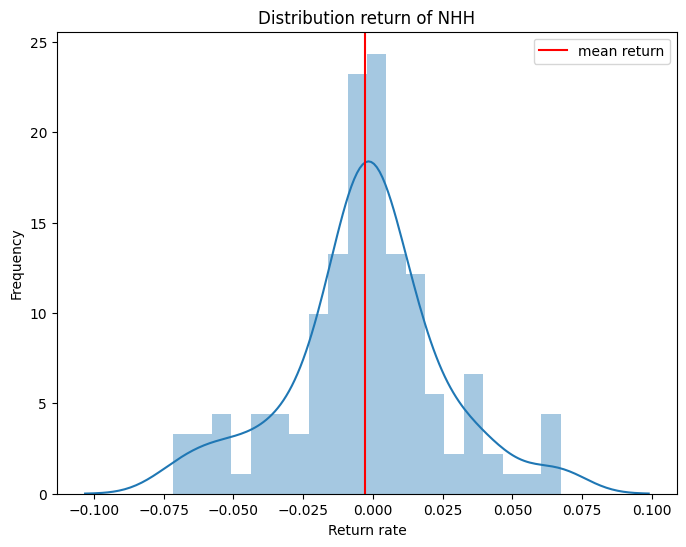

In [7]:
plt.figure(figsize = (8, 6))
sns.distplot(r_t, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.title('Distribution return of NHH')
plt.legend()
plt.xlabel('Return rate')
plt.ylabel('Frequency')

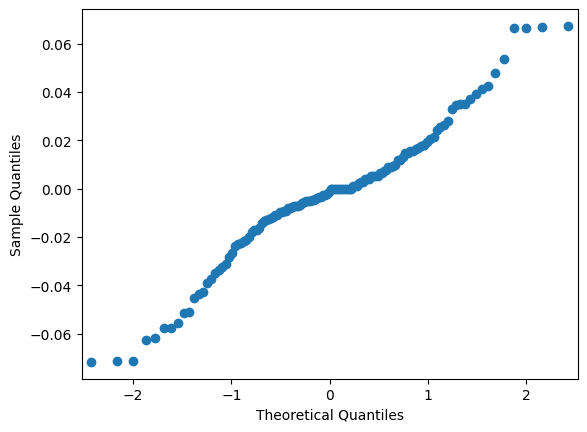

In [8]:
sm.qqplot(r_t)
plt.show()